In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('~/finance/csv/IBM_financial_data_hourly.csv')
df.head()

,timestamp,open,high,low,close,volume
0,2023-09-18,145.77,146.48,145.06,145.09,2508062
1,2023-09-15,147.11,147.85,145.53,145.99,6234033
2,2023-09-14,147.38,147.73,146.48,147.35,2723200
3,2023-09-13,145.95,146.98,145.92,146.55,2627999
4,2023-09-12,147.92,148.00,145.80,146.30,4457695


In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  100 non-null    datetime64[ns]
 1   open       100 non-null    float64       
 2   high       100 non-null    float64       
 3   low        100 non-null    float64       
 4   close      100 non-null    float64       
 5   volume     100 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 4.8 KB


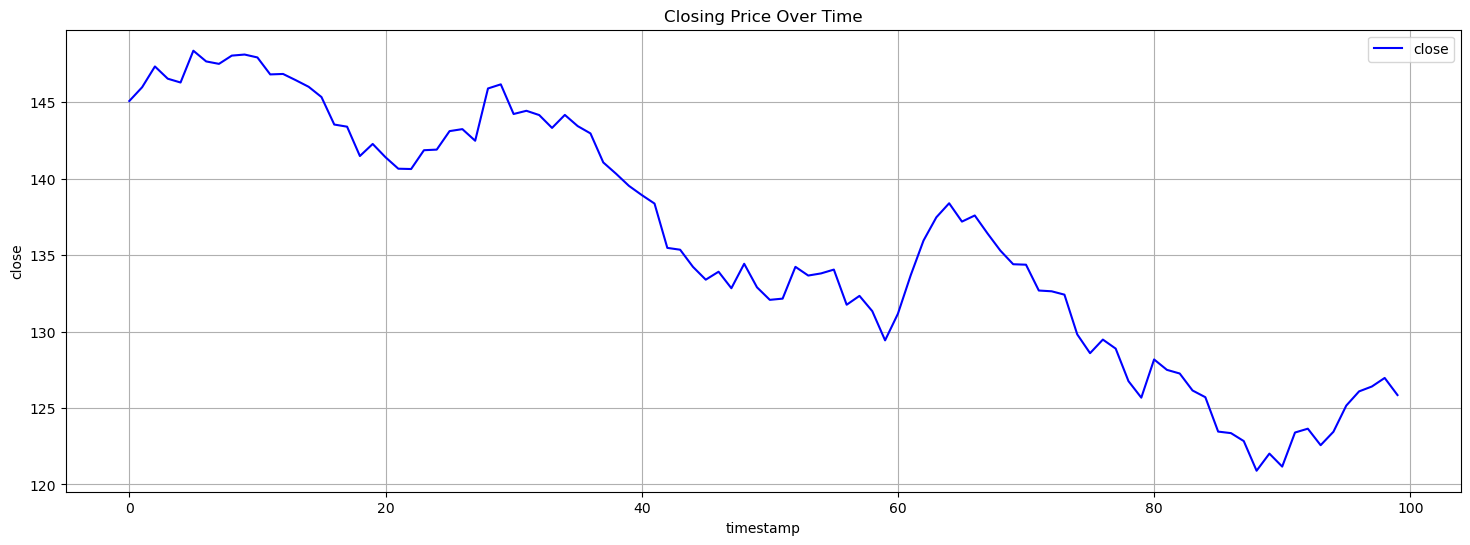

In [7]:
plt.figure(figsize=(18, 6))
plt.plot(df['close'], label='close', color='blue')
plt.title('Closing Price Over Time')
plt.xlabel('timestamp')
plt.ylabel('close')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
df_indexed = df.set_index('timestamp').sort_index(ascending=True)

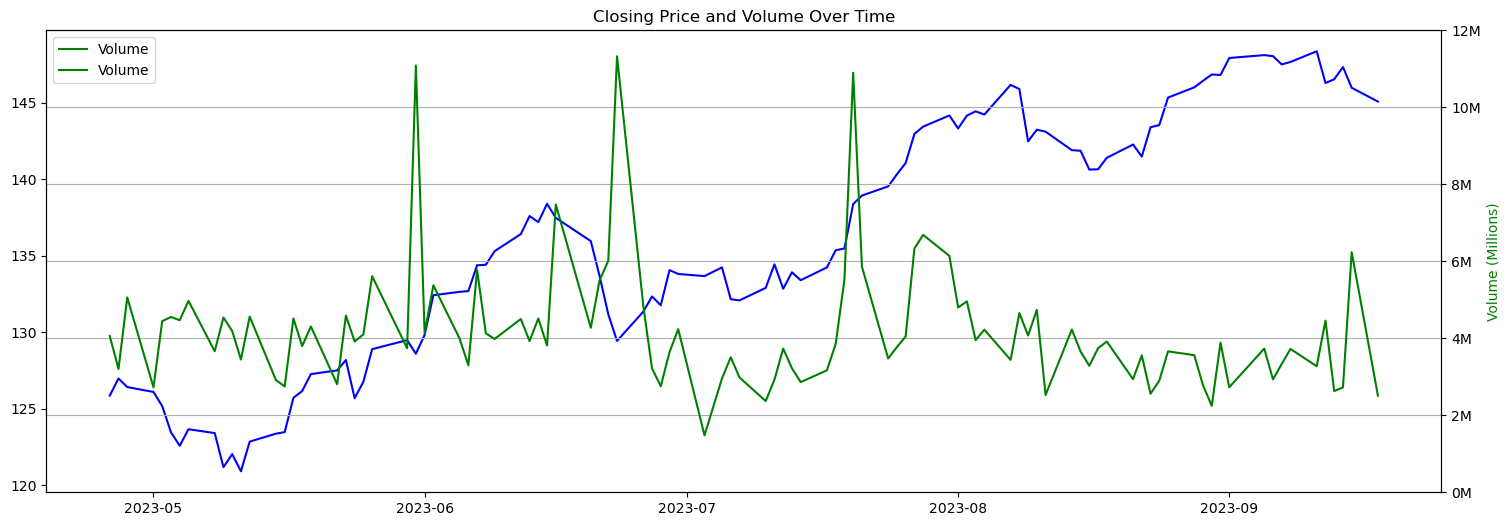

In [9]:
plt.figure(figsize=(18, 6))

plt.plot(df_indexed.index, df_indexed['close'], label='Close', color='blue')
ax2 = plt.gca().twinx()
ax2.plot(df_indexed.index, df_indexed['volume'], label='Volume', color='green')


volume_ticks = ax2.get_yticks() / 1000000
ax2.set_yticks(ax2.get_yticks())
ax2.set_yticklabels([f'{int(y)}M' for y in volume_ticks])
ax2.set_ylabel('Volume (Millions)', color='green')

lines, labels = plt.gca().get_legend_handles_labels()
ax2_lines, ax2_labels = ax2.get_legend_handles_labels()
lines.extend(ax2_lines)
labels.extend(ax2_labels)

plt.legend(lines, labels, loc='upper left')

plt.title('Closing Price and Volume Over Time')
plt.xlabel('Timestamp')
plt.grid(True)

plt.show()



In [10]:
df_indexed['returns'] = df_indexed['close'].pct_change()
df_indexed.head()

,open,high,low,close,volume,returns
timestamp,,,,,,
2023-04-26,125.81,126.545,125.120,125.85,4058800,NaN
2023-04-27,126.37,127.020,125.455,126.97,3204889,0.008899
2023-04-28,126.58,127.250,125.640,126.41,5061247,-0.004410
2023-05-01,126.35,126.750,126.060,126.09,2724992,-0.002531
2023-05-02,126.30,126.450,123.270,125.16,4445283,-0.007376


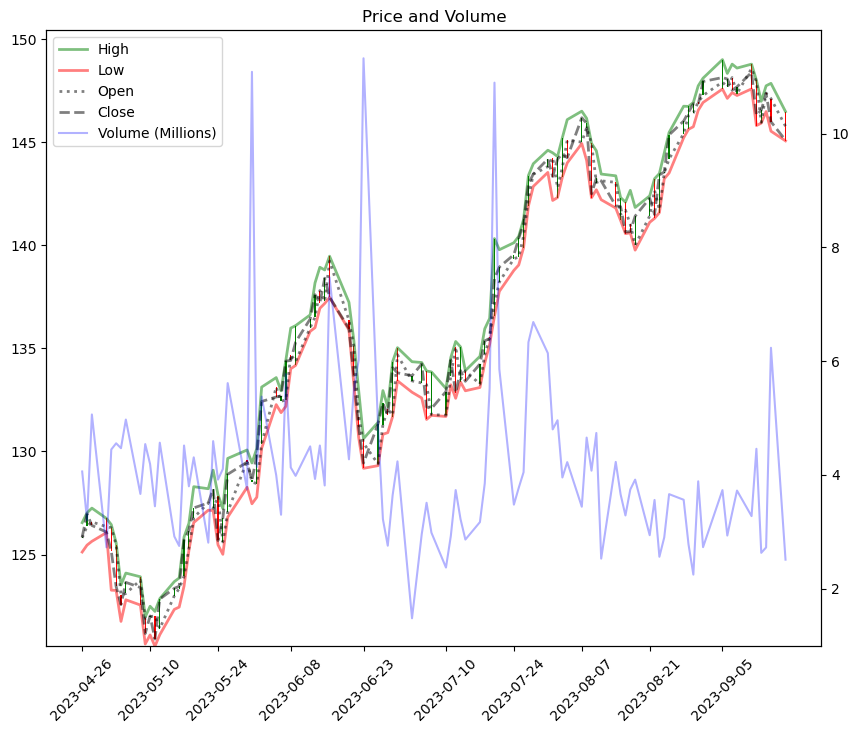

In [11]:
def plot_bars(bars, show_lines=False):
    fig, ax1 = plt.subplots(figsize=(10, 8))
    
    up = bars['close'] >= bars['open']
    
    ax1.bar(bars.index[up], bars.loc[up, 'high'] - bars.loc[up, 'low'], bottom=bars.loc[up, 'low'], color="green", width=0.05)
    ax1.bar(bars.index[~up], bars.loc[~up, 'high'] - bars.loc[~up, 'low'], bottom=bars.loc[~up, 'low'], color="red", width=0.05)
    ax1.bar(bars.index[up], bars.loc[up, 'close'] - bars.loc[up, 'open'], bottom=bars.loc[up, 'open'], color="green", width=0.25)
    ax1.bar(bars.index[~up], bars.loc[~up, 'open'] - bars.loc[~up, 'close'], bottom=bars.loc[~up, 'close'], color="red", width=0.25)
    
    ax2 = ax1.twinx()
    ax2.plot(bars.index, bars['volume'] / 1000000, color='blue', alpha=0.3, label='Volume (Millions)')
    
    
    x_ticks = bars.index[::10]  # Adjust the step to control tick frequency
    
    ax1.set_xticks(x_ticks)
    ax1.set_xticklabels([d.strftime('%Y-%m-%d') for d in x_ticks], rotation=45)
    ax1.set_title('Price and Volume')
    
    
    if show_lines:
        ax1.plot(bars['high'], color='green', alpha=0.5, label='High', linewidth=2)
        ax1.plot(bars['low'], color='red', alpha=0.5, label='Low', linewidth=2)
        ax1.plot(bars['open'], color='black', ls=':', alpha=0.5, label='Open', linewidth=2)
        ax1.plot(bars['close'], color='black', ls='--', alpha=0.5, label='Close', linewidth=2)
    
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines = lines1 + lines2
    labels = labels1 + labels2
    
    ax1.legend(lines, labels, loc='upper left')
    ax1.grid(False)

# Assuming you have a DataFrame 'df_indexed' with columns 'open', 'close', 'high', 'low', and 'volume'
plot_bars(df_indexed, show_lines=True)
plt.show()


<AxesSubplot:xlabel='timestamp'>

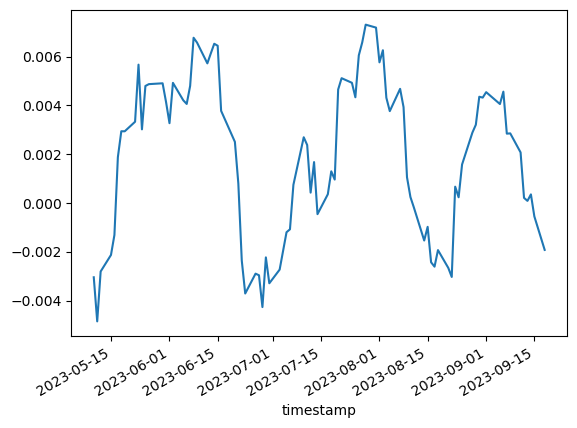

In [19]:
df_indexed['returns'].rolling(10).mean().plot()